In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm

In [2]:
ship6 = pd.read_csv("/content/drive/MyDrive/SCM-Cold Chain Data set/Shipment 6.csv")

In [3]:
ship6.isnull().sum()

t                  0
Front_Top          0
Front_Middle       0
Front_Bottom     293
Middle_Top         0
Middle_Middle      0
Middle_Bottom      0
Rear_Top           0
Rear_Middle        0
Rear_Bottom        0
dtype: int64

In [4]:
len(ship6)

321

In [5]:
ship6 = ship6.drop('Front_Bottom', axis=1)

In [6]:
ship6.isna().sum()

t                0
Front_Top        0
Front_Middle     0
Middle_Top       0
Middle_Middle    0
Middle_Bottom    0
Rear_Top         0
Rear_Middle      0
Rear_Bottom      0
dtype: int64

In [7]:
columns_ship6 = list(ship6.columns)
columns_ship6.remove("t")
columns_ship6

['Front_Top',
 'Front_Middle',
 'Middle_Top',
 'Middle_Middle',
 'Middle_Bottom',
 'Rear_Top',
 'Rear_Middle',
 'Rear_Bottom']

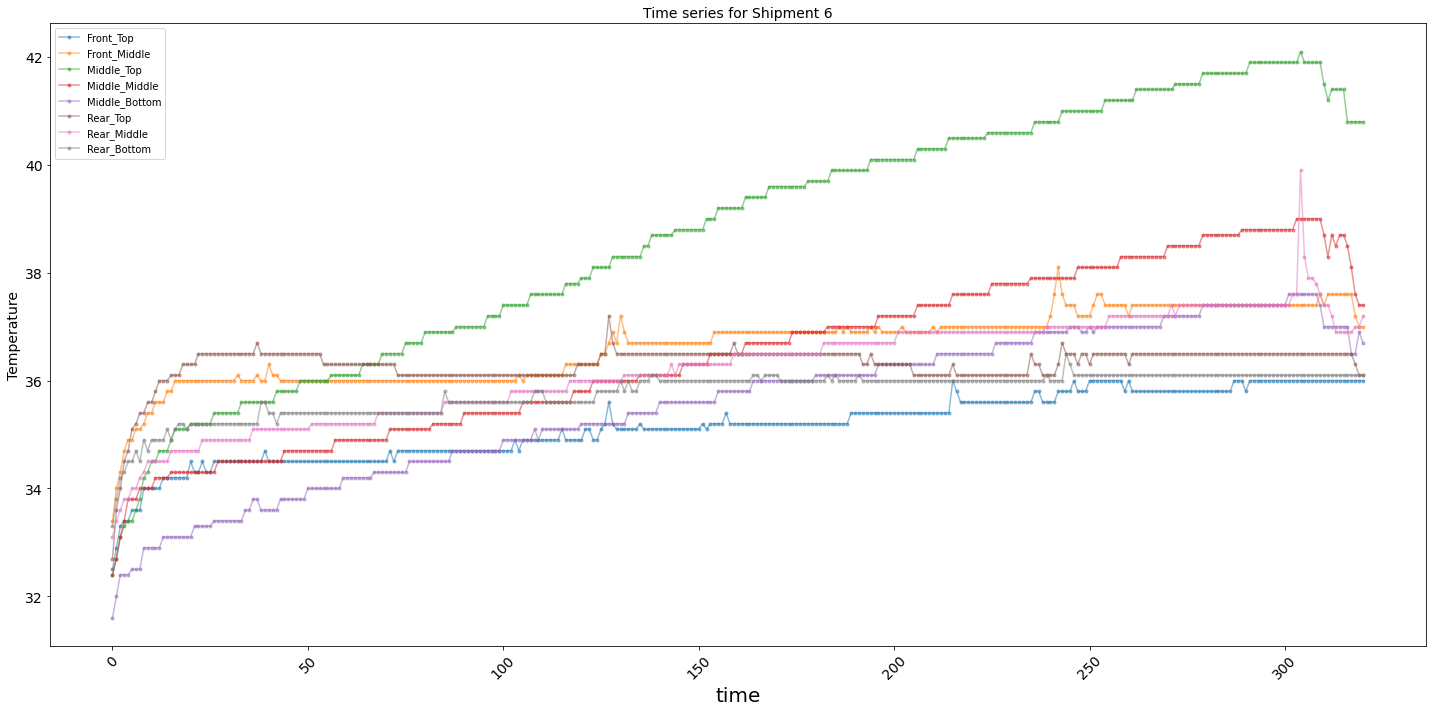

In [8]:
plt.figure(figsize=(20,10))
for index in columns_ship6:

  plt.plot(ship6.index, ship6[index], '.-', label= index, alpha=0.5)

plt.xlabel('time', fontsize=20)
plt.ylabel('Temperature', fontsize=14)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Time series for Shipment 6', fontsize=14)
plt.legend(columns_ship6)
plt.tight_layout()

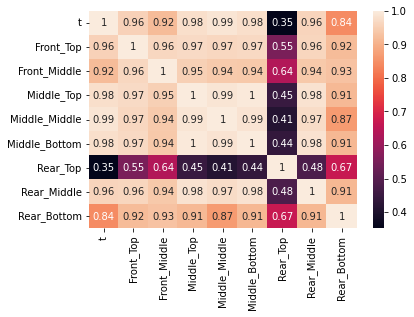

In [9]:
sns.heatmap(ship6.corr(), annot = True)

In [10]:
ship6_average = ship6
ship6_average = ship6_average.drop('t', axis=1)
ship6_average["Average"] = ship6_average.mean(axis=1)
ship6_average.head()

,Front_Top,Front_Middle,Middle_Top,Middle_Middle,Middle_Bottom,Rear_Top,Rear_Middle,Rear_Bottom,Average
0,32.5,33.4,32.4,32.4,31.6,32.7,33.1,33.3,32.6750
1,32.9,34.0,32.7,32.7,32.0,33.6,33.4,33.8,33.1375
2,33.3,34.3,33.1,33.1,32.4,34.0,33.6,34.2,33.5000
3,33.4,34.7,33.3,33.4,32.4,34.5,33.8,34.3,33.7250
4,33.4,34.9,33.4,33.8,32.4,34.7,33.8,34.5,33.8625


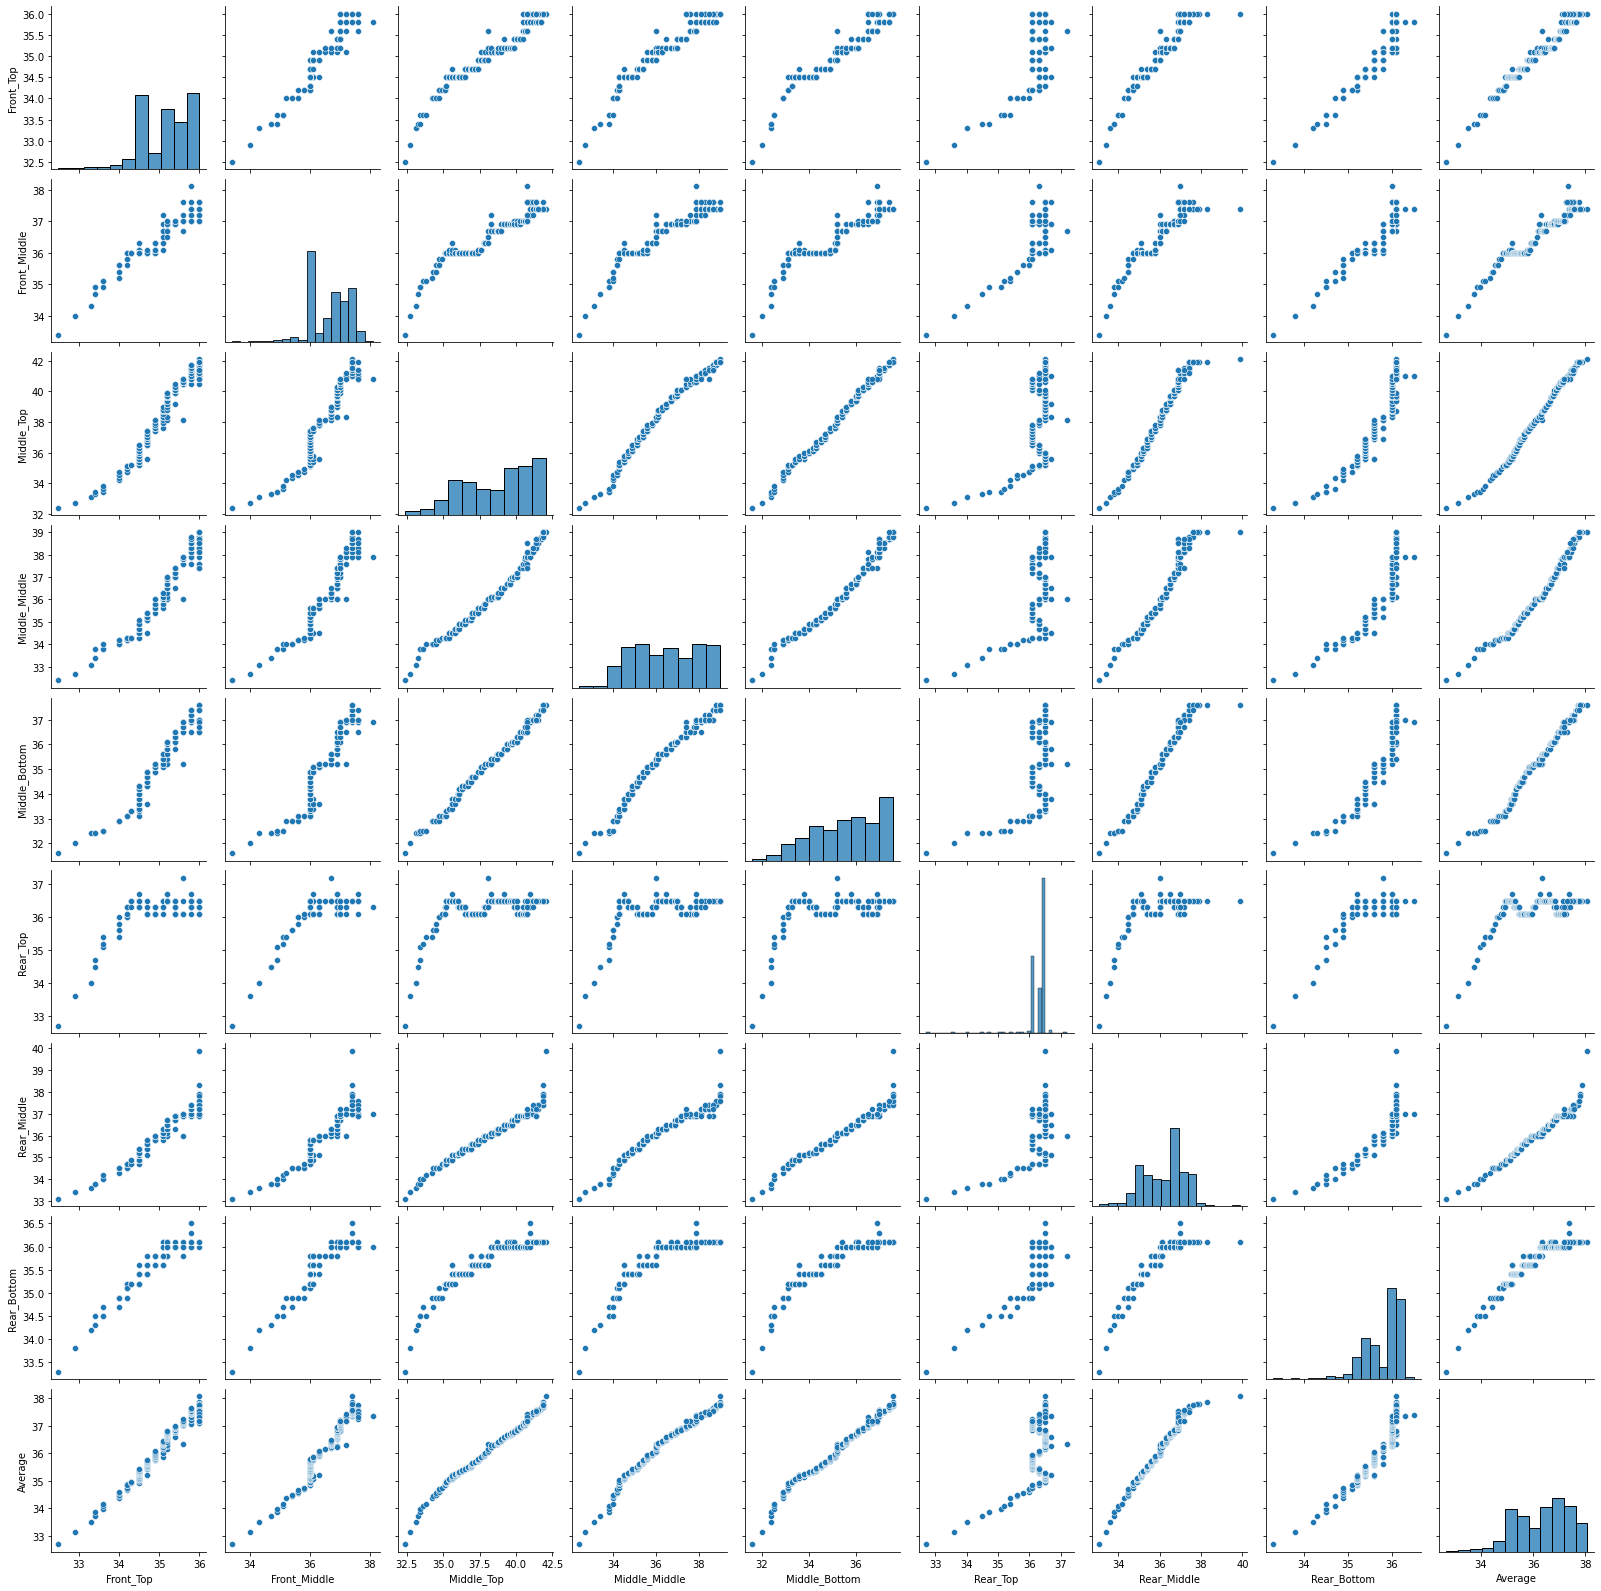

In [11]:
sns.pairplot(ship6_average)

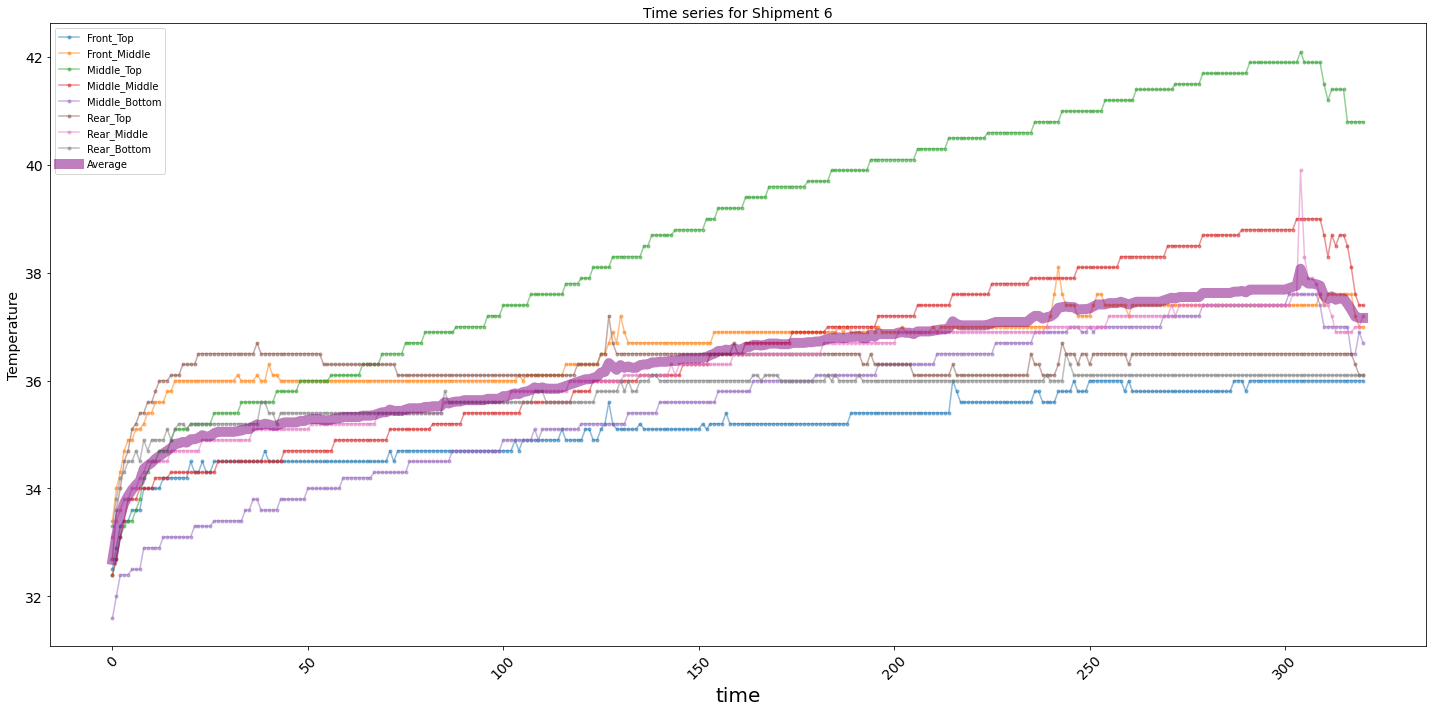

In [12]:
plt.figure(figsize=(20,10))
for index in columns_ship6:

  plt.plot(ship6.index, ship6[index], '.-', label= index, alpha=0.5)
plt.plot(ship6_average.index, ship6_average["Average"], label= "Average", alpha=0.5, color='purple', linewidth=10)
plt.xlabel('time', fontsize=20)
plt.ylabel('Temperature', fontsize=14)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Time series for Shipment 6', fontsize=14)
plt.legend()
plt.tight_layout()

In [13]:
features = list(ship6_average.columns)
features

['Front_Top',
 'Front_Middle',
 'Middle_Top',
 'Middle_Middle',
 'Middle_Bottom',
 'Rear_Top',
 'Rear_Middle',
 'Rear_Bottom',
 'Average']

In [14]:
from sklearn.model_selection import train_test_split
X = ship6["t"]
y = ship6_average["Average"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [15]:
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

**Linear Regression for shipment 6 temperature**

---



---



In [16]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()


In [17]:
sklearn_lin_reg0 = LinearRegression()
sklearn_lin_reg0.fit(X_train_reshaped, y_train)

LinearRegression()

In [18]:
y_pred1 = sklearn_lin_reg0.predict(X_test_reshaped)

In [19]:
x = sm.add_constant(X)
Linear_model = sm.OLS(y, X).fit()
print("AIC metrics for Linear Regression")
print(Linear_model.aic)
print("BIC metrics for Linear Regression")
print(Linear_model.bic)

AIC metrics for Linear Regression
2662.762859231023
BIC metrics for Linear Regression
2666.534300354153


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
from sklearn import metrics
print("Linear Regression metrics")

print('Mean Absolute error : ',metrics.mean_absolute_error(y_test,y_pred1))
print('Mean Squared error : ',metrics.mean_squared_error(y_test, y_pred1))
print('Squared Mean Squared error : ',np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('R2 Score : ',metrics.r2_score(y_test, y_pred1))

Linear Regression metrics
Mean Absolute error :  0.12199095134317846
Mean Squared error :  0.07078791283372572
Squared Mean Squared error :  0.26605997976720536
R2 Score :  0.9318657621612461


In [21]:
df_plot1 = pd.DataFrame({'y_test': (y_test).to_list(), 'y_pred': y_pred1}, index=y_test.index)

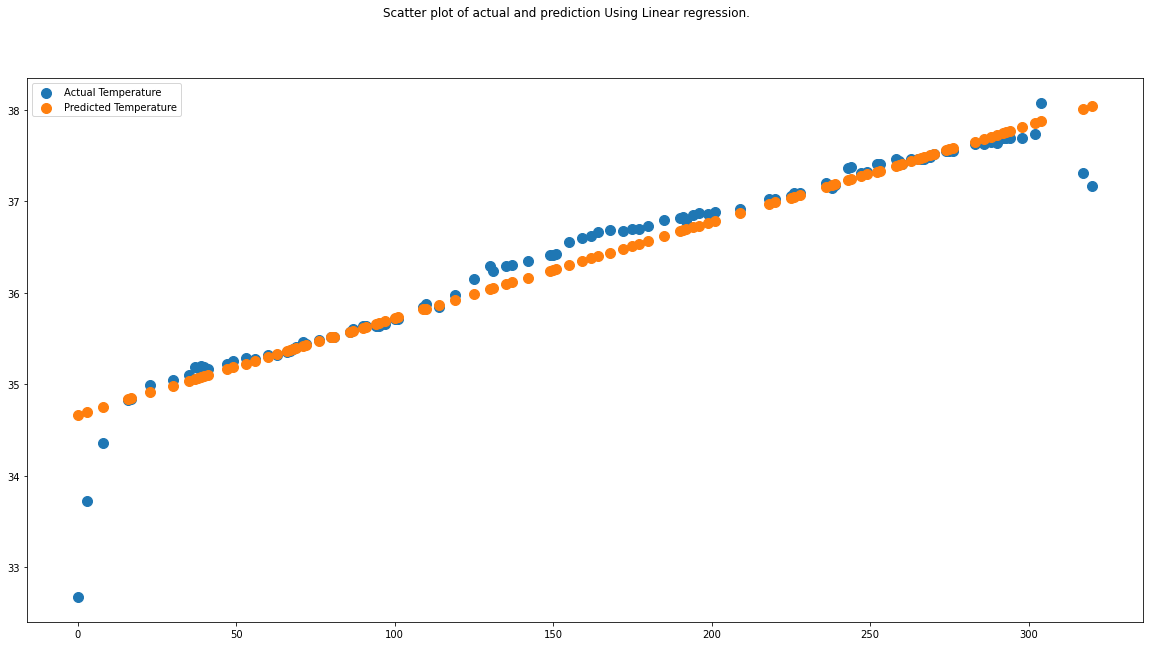

In [22]:
fig, axe = plt.subplots(figsize=(20,10))
fig.suptitle("Scatter plot of actual and prediction Using Linear regression.")
axe.scatter(x=df_plot1.index.to_list(), y=df_plot1['y_test'], label='Actual Temperature', s = 100)
axe.scatter(x=df_plot1.index.to_list(), y=df_plot1['y_pred'], label='Predicted Temperature', s = 100)
axe.legend()
plt.show()

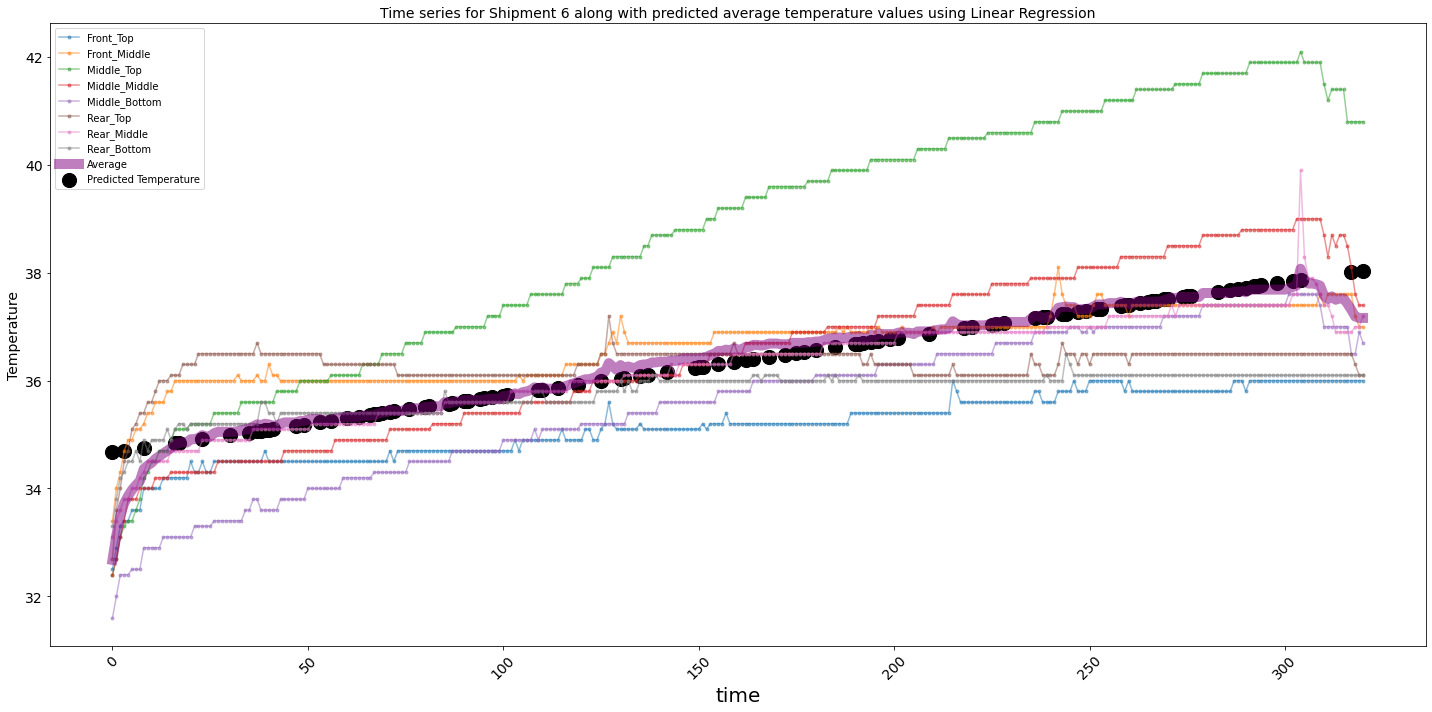

In [23]:
plt.figure(figsize=(20,10))
for index in columns_ship6:

  plt.plot(ship6.index, ship6[index], '.-', label= index, alpha=0.5)
plt.plot(ship6_average.index, ship6_average["Average"], label= "Average", alpha=0.5, color='purple', linewidth=10)
plt.scatter(x=df_plot1.index.to_list(), y=df_plot1['y_pred'], label='Predicted Temperature', s = 200, color = 'black')
plt.xlabel('time', fontsize=20)
plt.ylabel('Temperature', fontsize=14)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Time series for Shipment 6 along with predicted average temperature values using Linear Regression', fontsize=14)
plt.legend()
plt.tight_layout()

**Random Forrest Regressor**

---



---




In [24]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1, random_state = 0)
model =regressor.fit(X_train_reshaped, y_train)
# print(model.aic)

In [25]:
y_pred = regressor.predict(X_test_reshaped)

In [26]:
from sklearn import metrics
print("Random Forest Metrics")
print('Mean Absolute error : ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared error : ',metrics.mean_squared_error(y_test, y_pred))
print('Squared Mean Squared error : ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score : ',metrics.r2_score(y_test, y_pred))

Random Forest Metrics
Mean Absolute error :  0.040448113207547855
Mean Squared error :  0.017247936320754914
Squared Mean Squared error :  0.1313313988380346
R2 Score :  0.9833986488870441


In [27]:
df_plot = pd.DataFrame({'y_test': (y_test).to_list(), 'y_pred': y_pred}, index=y_test.index)

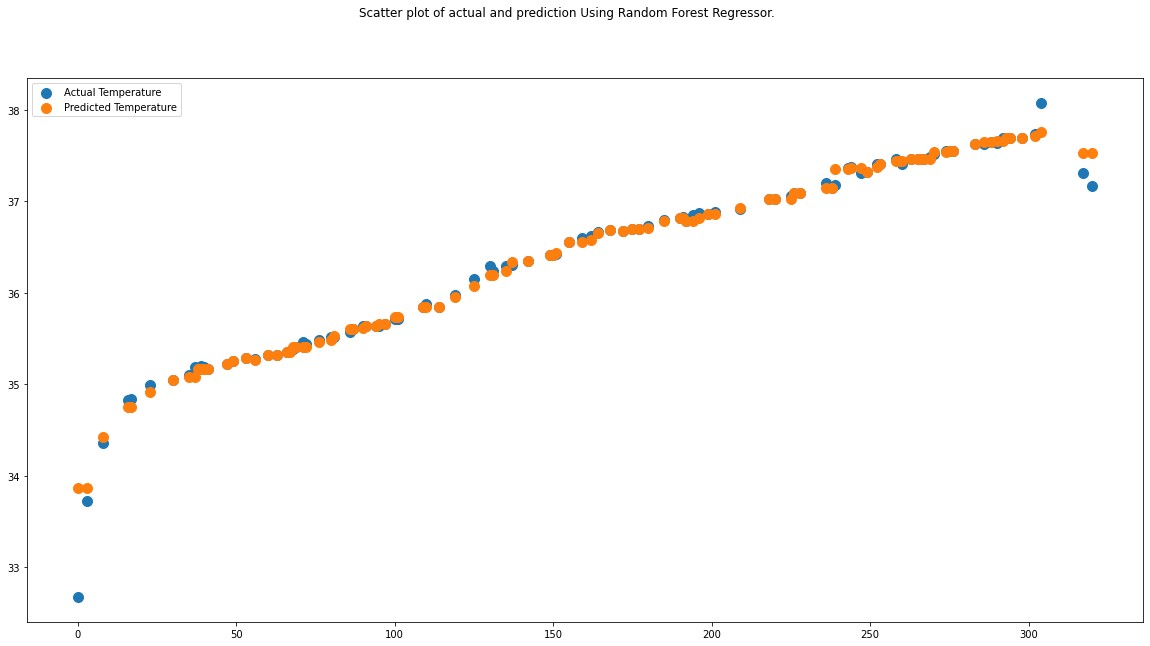

In [28]:
fig, axe = plt.subplots(figsize=(20,10))
fig.suptitle("Scatter plot of actual and prediction Using Random Forest Regressor.")
axe.scatter(x=df_plot.index.to_list(), y=df_plot['y_test'], label='Actual Temperature', s = 100)
axe.scatter(x=df_plot.index.to_list(), y=df_plot['y_pred'], label='Predicted Temperature', s = 100)
axe.legend()
plt.show()

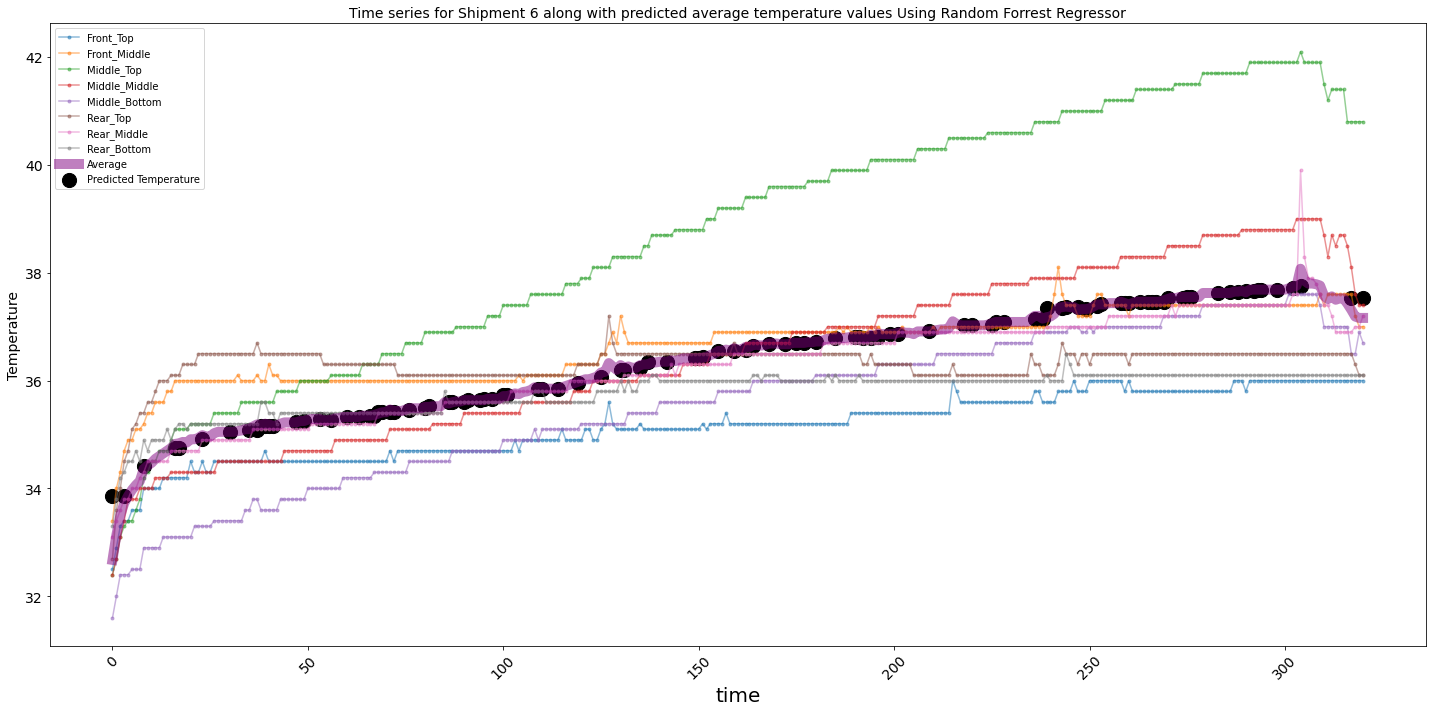

In [29]:
plt.figure(figsize=(20,10))
for index in columns_ship6:

  plt.plot(ship6.index, ship6[index], '.-', label= index, alpha=0.5)
plt.plot(ship6_average.index, ship6_average["Average"], label= "Average", alpha=0.5, color='purple', linewidth=10)
plt.scatter(x=df_plot.index.to_list(), y=df_plot['y_pred'], label='Predicted Temperature', s = 200, color = 'black')
plt.xlabel('time', fontsize=20)
plt.ylabel('Temperature', fontsize=14)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Time series for Shipment 6 along with predicted average temperature values Using Random Forrest Regressor', fontsize=14)
plt.legend()
plt.tight_layout()

**Decision Tree Regression with AdaBoost**:


---



---



In [30]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
rng = np.random.RandomState(1)
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

In [31]:
model1 = regr_1.fit(X_train_reshaped, y_train)
model2 = regr_2.fit(X_train_reshaped, y_train)

In [32]:
y_1 = regr_1.predict(X_test_reshaped)
y_2 = regr_2.predict(X_test_reshaped)

In [33]:
from sklearn import metrics
print("Metrics of decesion Tree Regressor")
print('Mean Absolute error : ',metrics.mean_absolute_error(y_test,y_1))
print('Mean Squared error : ',metrics.mean_squared_error(y_test, y_1))
print('Squared Mean Squared error : ',np.sqrt(metrics.mean_squared_error(y_test, y_1)))
print('R2 Score : ',metrics.r2_score(y_test, y_1))

Metrics of decesion Tree Regressor
Mean Absolute error :  0.08003229665818282
Mean Squared error :  0.014505219167179983
Squared Mean Squared error :  0.12043761525030286
R2 Score :  0.9860385479232687


In [34]:
from sklearn import metrics
print("Metrics of Adaboost Regressor")
print('Mean Absolute error : ',metrics.mean_absolute_error(y_test,y_2))
print('Mean Squared error : ',metrics.mean_squared_error(y_test, y_2))
print('Root Mean Squared error : ',np.sqrt(metrics.mean_squared_error(y_test, y_2)))
print('R2 Score : ',metrics.r2_score(y_test, y_1))

Metrics of Adaboost Regressor
Mean Absolute error :  0.03612888412962119
Mean Squared error :  0.005412712156793235
Root Mean Squared error :  0.07357113670994377
R2 Score :  0.9860385479232687


In [35]:
df_plot2 = pd.DataFrame({'y_test': (y_test).to_list(), 'y_pred': y_1}, index=y_test.index)
df_plot3 = pd.DataFrame({'y_test': (y_test).to_list(), 'y_pred': y_2}, index=y_test.index)

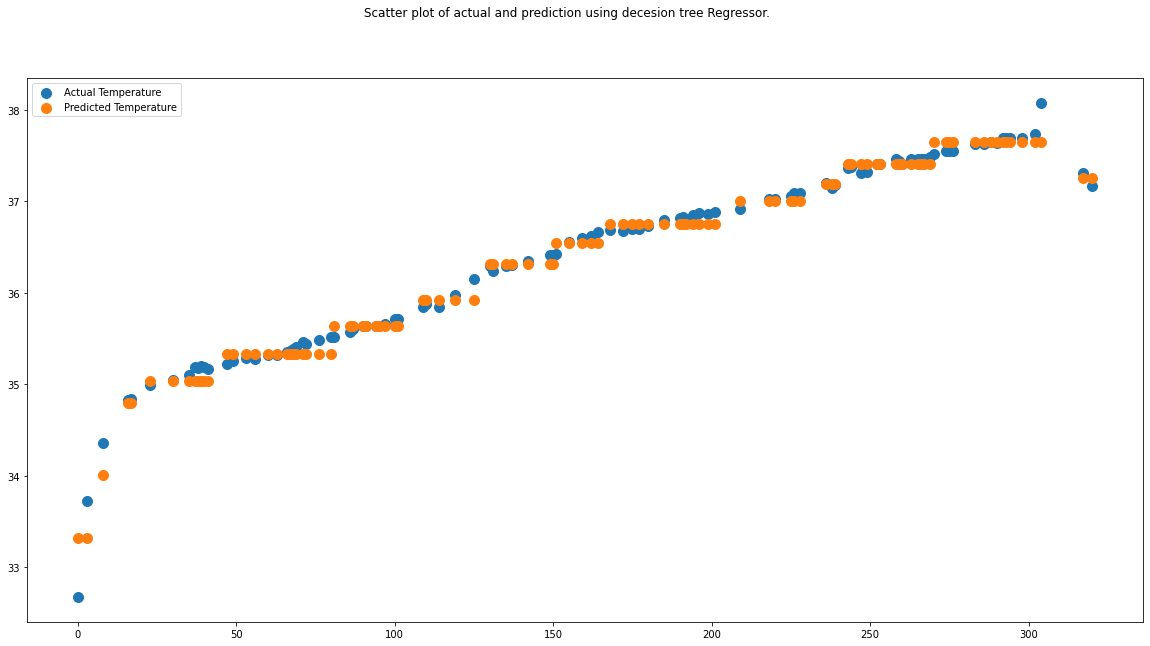

In [36]:
fig, axe = plt.subplots(figsize=(20,10))
fig.suptitle("Scatter plot of actual and prediction using decesion tree Regressor.")
axe.scatter(x=df_plot2.index.to_list(), y=df_plot2['y_test'], label='Actual Temperature', s = 100)
axe.scatter(x=df_plot2.index.to_list(), y=df_plot2['y_pred'], label='Predicted Temperature', s = 100)
axe.legend()
plt.show()

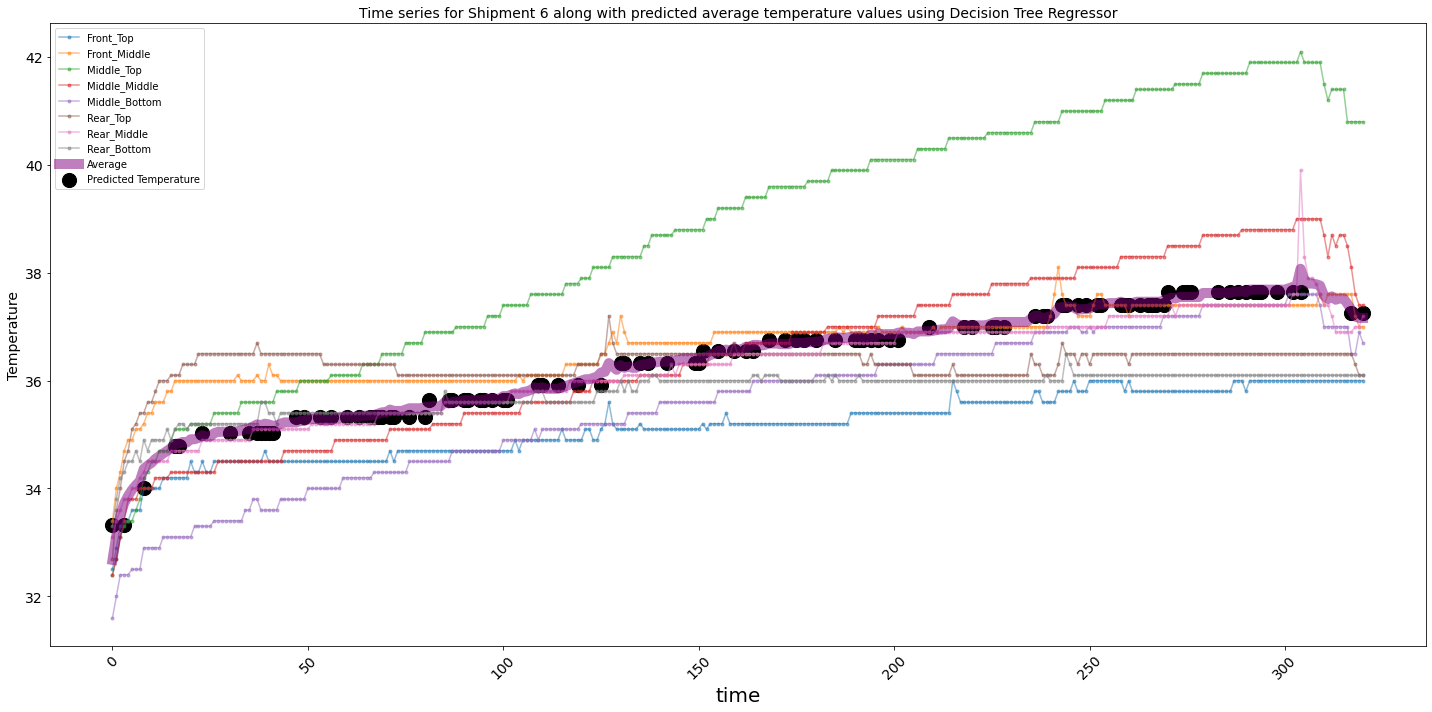

In [37]:
plt.figure(figsize=(20,10))
for index in columns_ship6:

  plt.plot(ship6.index, ship6[index], '.-', label= index, alpha=0.5)
plt.plot(ship6_average.index, ship6_average["Average"], label= "Average", alpha=0.5, color='purple', linewidth=10)
plt.scatter(x=df_plot2.index.to_list(), y=df_plot2['y_pred'], label='Predicted Temperature', s = 200, color = 'black')
plt.xlabel('time', fontsize=20)
plt.ylabel('Temperature', fontsize=14)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Time series for Shipment 6 along with predicted average temperature values using Decision Tree Regressor', fontsize=14)
plt.legend()
plt.tight_layout()

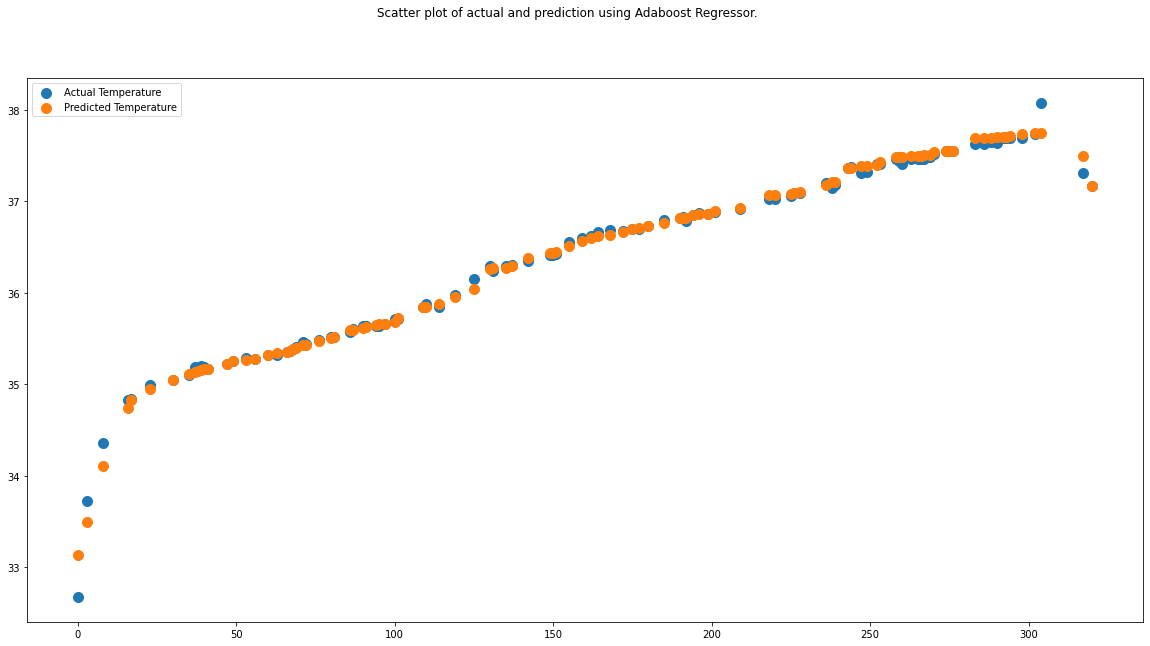

In [38]:
fig, axe = plt.subplots(figsize=(20,10))
fig.suptitle("Scatter plot of actual and prediction using Adaboost Regressor.")
axe.scatter(x=df_plot3.index.to_list(), y=df_plot3['y_test'], label='Actual Temperature', s = 100)
axe.scatter(x=df_plot3.index.to_list(), y=df_plot3['y_pred'], label='Predicted Temperature', s = 100)
axe.legend()
plt.show()

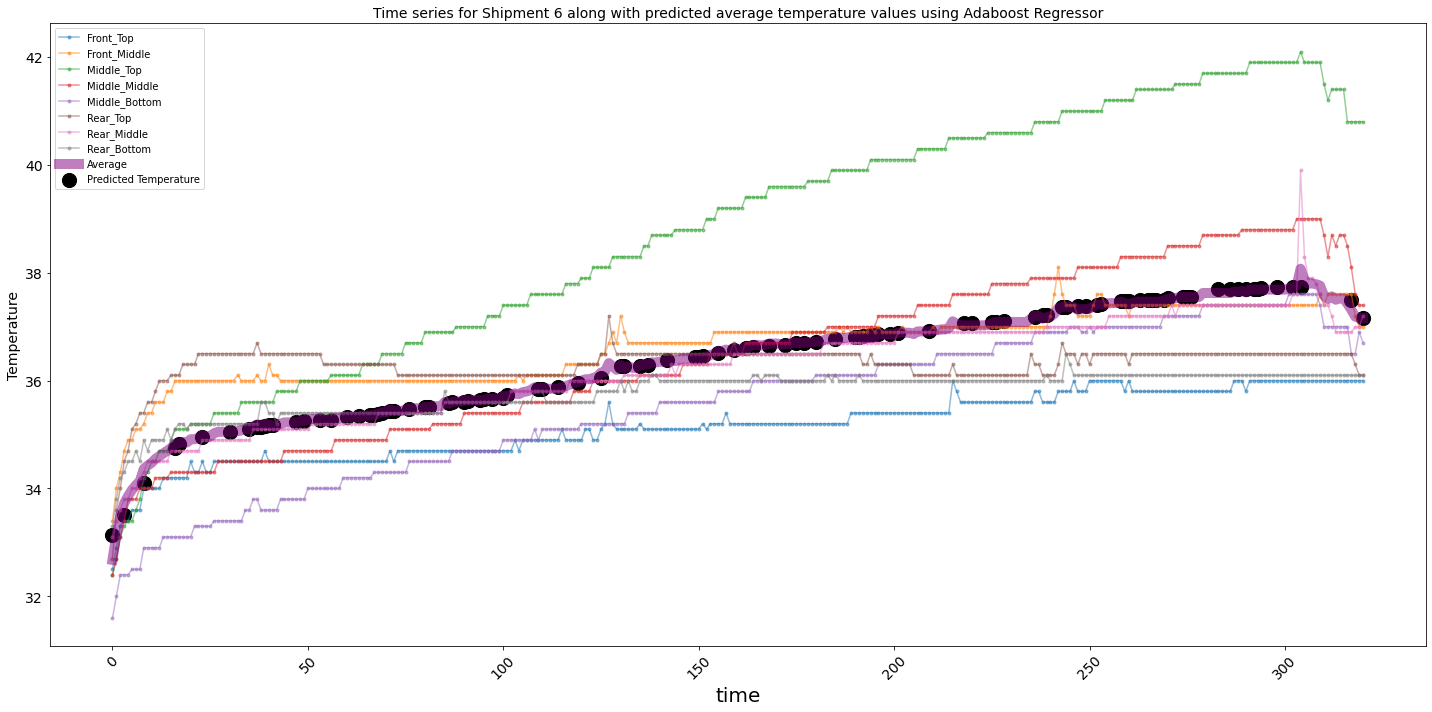

In [39]:
plt.figure(figsize=(20,10))
for index in columns_ship6:

  plt.plot(ship6.index, ship6[index], '.-', label= index, alpha=0.5)
plt.plot(ship6_average.index, ship6_average["Average"], label= "Average", alpha=0.5, color='purple', linewidth=10)
plt.scatter(x=df_plot3.index.to_list(), y=df_plot3['y_pred'], label='Predicted Temperature', s = 200, color = 'black')
plt.xlabel('time', fontsize=20)
plt.ylabel('Temperature', fontsize=14)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Time series for Shipment 6 along with predicted average temperature values using Adaboost Regressor', fontsize=14)
plt.legend()
plt.tight_layout()